In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('driver-data.csv', index_col='id')

In [3]:
data.head()

,mean_dist_day,mean_over_speed_perc
id,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 3423311935 to 3423311533
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean_dist_day         4000 non-null   float64
 1   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 93.8 KB


In [5]:
data.describe()

,mean_dist_day,mean_over_speed_perc
count,4000.000000,4000.000000
mean,76.041523,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


In [6]:
data.isna().sum()

mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

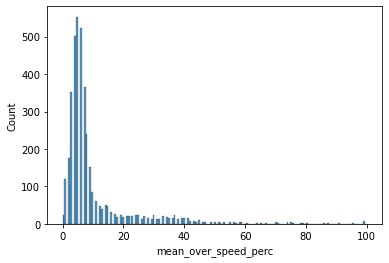

In [9]:
sns.histplot(data=data['mean_over_speed_perc']);

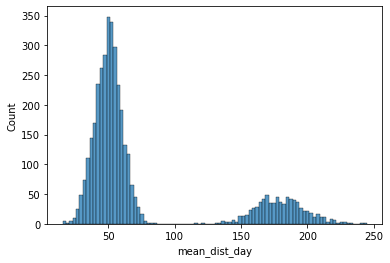

In [10]:
sns.histplot(data=data['mean_dist_day']);

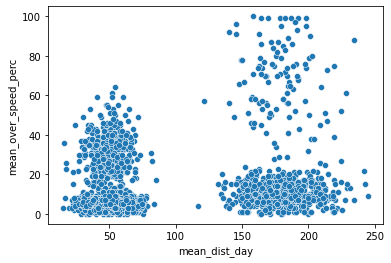

In [11]:
sns.scatterplot(data=data, x='mean_dist_day', y='mean_over_speed_perc');

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=4)

In [14]:
kmeans.fit(data)

KMeans(n_clusters=4)

In [16]:
print("Cluster's Center")
print(kmeans.cluster_centers_)

Cluster's Center
[[ 49.98428468   5.21441441]
 [180.34311782  10.52011494]
 [177.83509615  70.28846154]
 [ 50.46127059  32.42823529]]


In [26]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict_data = dict(zip(unique, counts))
print("Count of each cluster ", dict_data)

Count of each cluster  {0: 2775, 1: 696, 2: 104, 3: 425}


C:\Users\dhira\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


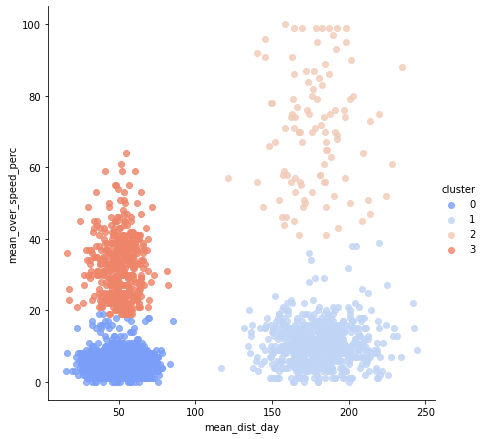

In [19]:
data["cluster"] = kmeans.labels_
sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=data,
           hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False);

In [24]:
print("Inertia : ", kmeans.inertia_)

Inertia :  719601.5383469046


In [22]:
print("Data with clusters")
print(data)

Data with clusters
            mean_dist_day  mean_over_speed_perc  cluster
id                                                      
3423311935          71.24                    28        3
3423313212          52.53                    25        3
3423313724          64.54                    27        3
3423311373          55.69                    22        3
3423310999          54.58                    25        3
...                   ...                   ...      ...
3423310685         160.04                    10        1
3423312600         176.17                     5        1
3423312921         170.91                    12        1
3423313630         176.14                     5        1
3423311533         168.03                     9        1

[4000 rows x 3 columns]
